# RDF Import and export

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">
    
[![Binder](https://mybinder.org/badge_logo.svg)](https://binder.materials-data.space/v2/gh/simphony/docs/dome4.0?filepath=docs%2Fusage%2Fsessions%2Fimport_export.ipynb "Click to run this tutorial yourself!")
    
</figure>

SimPhoNy sessions store the ontology individual information using the [RDF standard](https://www.w3.org/TR/rdf-concepts/) in an [RDF graph object](https://rdflib.readthedocs.io/en/stable/intro_to_graphs.html) from the [RDFLib](https://github.com/RDFLib/rdflib) library. Exporting such RDF graph is possible using the functions [import_file](../../api_reference.md#simphony_osp.tools.import_file) and [export_file](../../api_reference.md#simphony_osp.tools.export_file).

In [1]:
from simphony_osp.tools import import_file, export_file

<div class="admonition important">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Tip</div></div>
    
The full API specifications of the import and export functions can be found on the
[API reference page](../../api_reference.md).
    
</div>


In the examples on this page, the [city ontology](../ontologies/ontologies_included.md#the-city-ontology) is used. Make sure the city ontology is installed. If not, run the following command:

In [2]:
!pico install city

Then create a few ontology individuals

In [3]:
from simphony_osp.namespaces import city

freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
peter = city.Citizen(name="Peter", age=30)
anne = city.Citizen(name="Anne", age=20)
freiburg[city.hasInhabitant] += peter, anne

## Exporting individuals

The `export_file` function allows to export either all the contents of a session, or select a few ontology individuals to be exported.

For example, exporting Freiburg and Peter

In [4]:
export_file({freiburg, peter}, file='./data.ttl', format='turtle')

creates the file `data.ttl` with the following content.

In [5]:
from sys import platform

if platform == 'win32':
    !more data.ttl
else:
    !cat data.ttl

@prefix ns1: <https://www.simphony-osp.eu/city#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.simphony-osp.eu/entity#e0eb6516-b2f8-4323-a407-f4a98bf46a61> a ns1:City ;
    ns1:coordinates "13YFp0RR93AD@t&xBo{#)k4YS)LtJz"^^<https://www.simphony-osp.eu/types#Vector> ;
    ns1:hasInhabitant <https://www.simphony-osp.eu/entity#3153c78e-a5ee-4065-913a-776c33c30c9e> ;
    ns1:name "Freiburg"^^xsd:string .

<https://www.simphony-osp.eu/entity#3153c78e-a5ee-4065-913a-776c33c30c9e> a ns1:Citizen ;
    ns1:age 30 ;
    ns1:name "Peter"^^xsd:string .



Note that when individuals that are connected are **exported  together**, their connections are kept in the exported file.

If instead, you wish to export all the individuals in a session, then pass the session object to be exported.

In [6]:
from simphony_osp.session import core_session

export_file(core_session, file='./data.ttl', format='turtle')

if platform == 'win32':
    !more data.ttl
else:
    !cat data.ttl

@prefix city: <https://www.simphony-osp.eu/city#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.simphony-osp.eu/entity#e0eb6516-b2f8-4323-a407-f4a98bf46a61> a city:City ;
    city:coordinates "13YFp0RR93AD@t&xBo{#)k4YS)LtJz"^^<https://www.simphony-osp.eu/types#Vector> ;
    city:hasInhabitant <https://www.simphony-osp.eu/entity#3153c78e-a5ee-4065-913a-776c33c30c9e>,
        <https://www.simphony-osp.eu/entity#70d74233-989f-4cb2-9b67-3635801b2037> ;
    city:name "Freiburg"^^xsd:string .

<https://www.simphony-osp.eu/entity#3153c78e-a5ee-4065-913a-776c33c30c9e> a city:Citizen ;
    city:age 30 ;
    city:name "Peter"^^xsd:string .

<https://www.simphony-osp.eu/entity#70d74233-989f-4cb2-9b67-3635801b2037> a city:Citizen ;
    city:age 20 ;
    city:name "Anne"^^xsd:string .



You can change the output format by entering a different value for the parameter `format`. A list of supported formats is available on [this page](../ontologies/supported_formats.html#supported-formats).

## Importing individuals

To import data, use the `import_file` method. Let's assume we wish to import the data from the previous example in a new session. The following code will help us achieve our aim:

In [7]:
from simphony_osp.session import Session
from simphony_osp.tools import import_file

session = Session(); session.locked = True

with session:
    import_file('./data.ttl')

<div class="admonition note">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Note</div></div>
    
The format is automatically inferred from the file extension. To specify it explicitly, you can add the `format` parameter, like so: `import_file('./data.ttl', format='turtle')`.
    
</div>

<div class="admonition note">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Note</div></div>
    
A `session` keyword argument can be optionally provided. When not specified, data is imported to the default sesion.  You can specify the session explicitly like so: `import_file('./data.ttl', session=session)`.
    
</div>

Now we can verify the data was indeed imported:

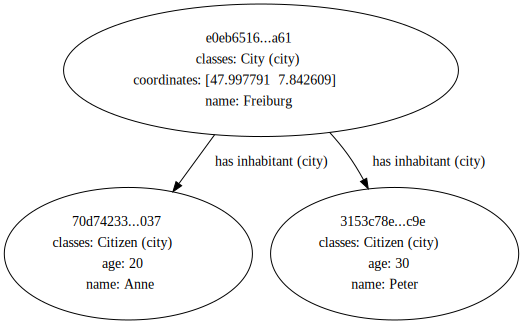

In [8]:
from simphony_osp.tools import semantic2dot

semantic2dot(session)

## Interpretation of RDF files

The [ontology languages supported by SimPhoNy](../ontologies/supported_formats.md) can be serialized as RDF files, but the [RDF standard](https://www.w3.org/TR/rdf-concepts/) can store data that does not necessarily have anything to do with an ontology. Moreover, as described in the [introduction to sessions](introduction.ipynb), SimPhoNy sessions have been designed to exlusively store assertional knowledge (ontology individuals). 

Due to these factors, SimPhoNy enforces a few constraints when importing and exporting individuals from/to RDF files, that can, however, **also be disabled if desired**.

1. No terminological knowledge can be present in the file. Any RDF triple with predicate `rdf:type` and one of `owl:Class`, `rdfs:Class`, `owl:AnnotationProperty`, `rdf:Property`, `owl:DatatypeProperty`, `owl:ObjectProperty`, `owl:Restriction` as object raises an exception.

2. The subjects of any RDF triple with predicate `rdf:type` and an IRI not listed above as object are considered to be the identifiers of ontology individuals. Therefore, SymPhoNy will look into its installed ontologies for a class matching the object of the triple. If this lookup fails, an exception is raised. This behavior is meant to prevent you from making the mistake of importing data for which you have not installed the corresponding ontology.

3. If an RDF triple where the subject has been succesfully identified as an ontology individual has a predicate different from `rdf:type` that cannot be recognized as an annotation, relationship nor an attribute, an exception will be raised.

4. If an RDF triple where the subject has been succesfully identified as an ontology individual has a predicate that can be recognized as a relationship, but has an object that cannot be recognized as an ontology individual (for example, because no `rdf:type` has been defined for it), then an exception will be raised.

5. If an RDF triple where the subject has been succesfully identified as an ontology individual has a predicate that can be recognized as a relationship, but has a literal as an object, an exception will be raised.

6. If an RDF triple where the subject has been succesfully identified as an ontology individual has a predicate that can be recognized as an attribute, but has a IRI as an object, an exception will be raised.

7. Any triples whose subject cannot be identified as terminological knowledge, as ontology individuals, or for which (2) does not apply are **not imported**. No warning nor exception of any kind is raised for such triples.

<div class="admonition warning">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Warning</div></div>
    
Point (7) implies that using the default options, you can lose data that was originally in the source, **without** warnings nor errors to notify you about it. Keep reading to learn how to prevent it. 
    
</div>

There are two keyword arguments that can be passed to the import and export functions to bypass these checks.

- `all_triples`: When set to `True`, no exceptions will be raised for points (2)*, (3), (4), (5), (6). Warnings will still be emitted.
- `all_statements`: When set to `True`, none of the points above apply. All RDF triples are imported, and **no information is lost**. No warnings are emitted.

<div class="admonition note">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Note</div></div>
    
\* To be recognized as an ontology individual, at least one of the types of the subject need to be defined in the [installed ontologies](../ontologies/pico.md). If you use `all_triples=True` when none of the types are defined in the installed ontologies, then (7) applies to such subject (its information is lost).
    
</div>

<div class="admonition warning">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Warning</div></div>
    
Be careful when using `all_triples` and especially, when using `all_statements`. SimPhoNy's sessions have been designed to work only with ontology individuals. If you use `all_statements=True`, then also classes, relationships, annotations and attributes will be imported to the session, but as SimPhoNy is not ready to deal with this situation, this may lead to errors.
    
</div>


Below there is sample RDF graph that helps understanding all the cases.

![Sample RDF graph exemplifying cases where the constraints above apply](../../_static/importexport_graph.png)

1. The triple (`example:Skaters`, `rdf:type`, `owl:Class`) would trigger this case, because it defines terminological knowledge.
2. The triple (`example:Marco`, `rdf:type`, `foaf:Person`) matches this case, because the namespace `foaf` is not installed.
3. The triple (`example:Klaus`, `foaf:knows`, `example:Lena`) raises an exception, because the namespace `foaf` is not installed.
4. The triple (`example:Freiburg`, `city:hasInhabitant`, `example:Rob`) triggers this case, because `example:Rob` does not have any type assigned and therefore, it is not identified as an ontology individual.
5. The triple (`example:Freiburg`, `city:hasWorker`, `Lena (xsd:string)`) matches this case, as "has worker" is a relationship, but the object is a literal.
6. The triple (`example:Freiburg`, `city:coordinates`, `<geo:47.995,7.85>`) raises an exception, because "coordinates" is an attribute, but the object is an IRI.
7. The triple (`example:Something`, `example:predicate`, `example:Thing`) fits into this case.